# Python code for Visualisation


Created by Martijn on 09-11-2018

### Description
 This notebook visualises the adressess of suspected brothes on the map of Amsterdam (on the level of zipcodes)
 
 
### Requirements
 To make it work you have to do the following:
 

 (1) Make sure you have the file "DSP_map.ipynb" in the same folder as this file
 
 (2) Make sure you have the folder "DSP_data" in the same folder as this file (you can get DSP_data from the drive)
 
 (3) to import functions from the file "DSP_map" the 'import_ipynb' package is used
 
 To install import_ipynb use:
 
 pip install import_ipynb
 
 See https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file  for further reference



In [1]:
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd 
import pickle
import import_ipynb
import DSP_map
from DSP_map import *

importing Jupyter notebook from DSP_map.ipynb


### Transform the data to something intergratable with a map

In [2]:
# Original structure dataframe:
#  ________________    ____________   ________________    ______________    __________________
#  | Topic Adresss1 |--|Prostitute|--| Last post Date |-->|supbost Date |-->|(Adress,zipcode)|
#  |________________|  |__________|  |________________|   |_____________|   |________________|
#                                                         |                 |_________________
#                                                         |                 |(Adress,zipcode)|
#                                                         |                 |________________|
#                                                         |_____________     _________________
#                                                         |subpost date |-->|(Adress,zipcode)|
#                                                         |_____________|   |________________|
#                                                                     

adresses = [] 
co_occurrencce ={}


for i in range(1,11): 
    unpickled_df = pd.read_pickle("DSP_data/page" + str(i)+".pkl") 
    
    # loop over topics
    for row in unpickled_df['subPageInfo']:
        # loop over posts
        for post in row: 

            # post[0] = postdate, post[1] = mentioned adresses
            for adress in post[1]:  
                adresses.append(adress)  
                 

##  Make a heat map of all unique adresses 
Take all unique adresses and plot the frequency per area

In [3]:
# this is not so beautiful code
unique_addresses = pd.Series(adresses).unique()

zipC = []
for uniqueAdr in unique_addresses:
    zipC.append(uniqueAdr[1])
    
frequency_per_zipcode = pd.Series(dict((int(x),zipC.count(x)) for x in set(zipC)))                 

<module 'matplotlib.pyplot' from '/home/martijn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

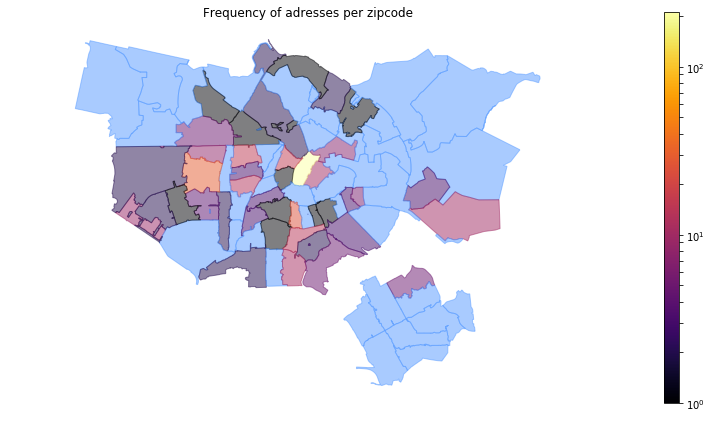

In [4]:
plotMap(frequency_per_zipcode, "Frequency of adresses per zipcode")       

## Make a heatmap of all mentioned adresses
Take all adresses which are mentioned on the subpages and plot the frequency per area

In [5]:
zipC = []
for uniqueAdr in adresses:
    zipC.append(uniqueAdr[1])
    
total_adress_mentions = pd.Series(dict((int(x),zipC.count(x)) for x in set(zipC)))     

<module 'matplotlib.pyplot' from '/home/martijn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

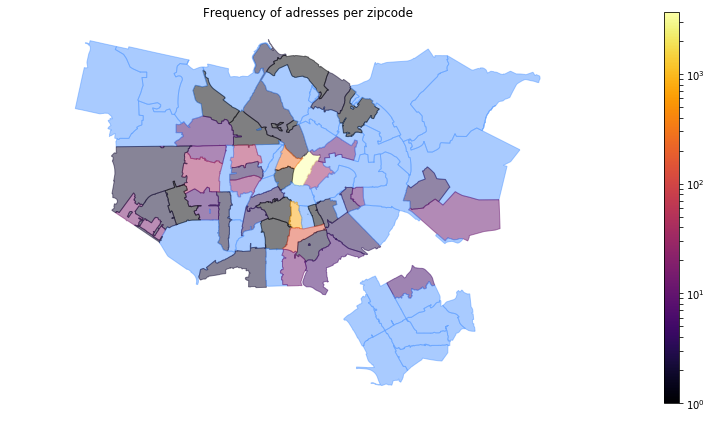

In [6]:
plotMap(total_adress_mentions, "Frequency of adresses per zipcode") 

In [ ]:
# To Do


# make a plot of the topic adressess vs the adress mentioned in the subposts.
# to dor this you ll have to measure co_occurrence 
 